In [1]:
#pip install dedupe

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.8/114.8 kB 9.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 5.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of dedupe-variable-datetime to determine which version is compatible with other requirements. This could take a while.
  Using cached future-1.0.0-py3-none-any.whl.metadata (4.0 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 10.2 MB/s eta 0:00:00
  Using cached joblib-1.4.0-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.4.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.8/973

In [1]:
import dedupe

In [2]:
#pip install pandas

In [3]:
import pandas as pd

In [4]:
# Importing the necessary libraries
import pandas as pd

# Reading the left and right datasets from CSV files
left_df = pd.read_csv('/Users/chloe/Desktop/group-project-spring-2024/Data/GroupProject/entity-resolution/left_dataset.csv')
right_df = pd.read_csv('/Users/chloe/Desktop/group-project-spring-2024/Data/GroupProject/entity-resolution/right_dataset.csv')

In [5]:
def preprocess(left_df,right_df):
    right_df.rename(columns={'zip_code': 'postal_code'}, inplace=True)
    def preprocess_data(df):
        # Convert postal codes and states to strings, ensuring no type discrepancies
        df['postal_code'] = df['postal_code'].astype(str).str.split('-').str[0].str.strip()
        df['state'] = df['state'].astype(str).str.strip()
        df['name'] = df['name'].astype(str).str.lower().str.strip().apply(lambda x: re.sub(r'[^\w\s]', '', x))
        df['address'] = df['address'].astype(str).str.lower().str.strip().apply(lambda x: re.sub(r'[^\w\s]', '', x))
        df['city'] = df['city'].astype(str).str.lower().str.strip().apply(lambda x: re.sub(r'[^\w\s]', '', x))
        return df
    left_df = preprocess_data(left_df)
    right_df = preprocess_data(right_df)
    left_df.fillna('unknown', inplace=True)
    left_df['postal_code'] = left_df['postal_code'].astype(str).apply(lambda x: x.split('.')[0])
    return (left_df,right_df)

In [49]:
left_df

,entity_id,name,address,city,state,postal_code,categories
0,1,the ups store,87 grasso plaza shopping center,affton,MO,63123,"Shipping Centers, Local Services, Notaries, Ma..."
1,2,st honore pastries,935 race st,philadelphia,PA,19107,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
2,3,perkiomen valley brewery,101 walnut st,green lane,PA,18054,"Brewpubs, Breweries, Food"
3,4,sonic drivein,615 s main st,ashland city,TN,37015,"Burgers, Fast Food, Sandwiches, Food, Ice Crea..."
4,5,famous footwear,8522 eager road dierbergs brentwood point,brentwood,MO,63144,"Sporting Goods, Fashion, Shoe Stores, Shopping..."
...,...,...,...,...,...,...,...
94580,94581,adelita taqueria restaurant,1108 s 9th st,philadelphia,PA,19147,"Restaurants, Mexican"
94581,94582,inspcenterthai clinical massage,2625 n meridian st unit 50,indianapolis,IN,46208,"Massage Therapy, Rolfing, Beauty & Spas, Refle..."
94582,94583,wild birds unlimited,2813 bransford ave,nashville,TN,37204,"Pets, Nurseries & Gardening, Pet Stores, Hobby..."
94583,94584,claires boutique,6020 e 82nd st ste 46,indianapolis,IN,46250,"Shopping, Jewelry, Piercing, Toy Stores, Beaut..."


In [50]:
right_df

,business_id,name,address,city,state,postal_code,size
0,1,sourini painting inc,12800 44th st n,clearwater,FL,33762,11.0
1,2,wolff dolla bill llc,1905 e 19th ave,tampa,FL,33605,8.0
2,3,comprehensive surgery center llc,1988 gulf to bay blvd ste 1,clearwater,FL,33765,8.0
3,4,frank adam apparel llc,13640 wright cir,tampa,FL,33626,12.0
4,5,moreno plus transport inc,8608 huron court unite 58,tampa,FL,33614,8.0
...,...,...,...,...,...,...,...
91786,91787,deh transport llc,737 e statue ct,franklin,TN,37067,2.0
91787,91788,tm inc llc,4911 georgia ave,nashville,TN,37209,4.0
91788,91789,passion transportation services llc,2005 quail dr,nashville,TN,37207,2.0
91789,91790,rosie cleaning servicecommercial,705 n 9th st,nashville,TN,37206,5.0


In [5]:
# Rename columns in right_df to match those in left_df
right_df.rename(columns={'zip_code': 'postal_code'}, inplace=True)

In [10]:
import re

In [7]:

def preprocess_data(df):
    # Convert postal codes and states to strings, ensuring no type discrepancies
    df['postal_code'] = df['postal_code'].astype(str).str.split('-').str[0].str.strip()
    df['state'] = df['state'].astype(str).str.strip()
    df['name'] = df['name'].astype(str).str.lower().str.strip().apply(lambda x: re.sub(r'[^\w\s]', '', x))
    df['address'] = df['address'].astype(str).str.lower().str.strip().apply(lambda x: re.sub(r'[^\w\s]', '', x))
    df['city'] = df['city'].astype(str).str.lower().str.strip().apply(lambda x: re.sub(r'[^\w\s]', '', x))
    return df

# Apply the preprocessing function to both dataframes
left_df = preprocess_data(left_df)
right_df = preprocess_data(right_df)


In [8]:
left_df.fillna('unknown', inplace=True)

In [9]:
right_df.head()

,business_id,name,address,city,state,postal_code,size
0,1,sourini painting inc,12800 44th st n,clearwater,FL,33762,11.0
1,2,wolff dolla bill llc,1905 e 19th ave,tampa,FL,33605,8.0
2,3,comprehensive surgery center llc,1988 gulf to bay blvd ste 1,clearwater,FL,33765,8.0
3,4,frank adam apparel llc,13640 wright cir,tampa,FL,33626,12.0
4,5,moreno plus transport inc,8608 huron court unite 58,tampa,FL,33614,8.0


In [10]:
left_df.head()

,entity_id,name,address,city,state,postal_code,categories
0,1,the ups store,87 grasso plaza shopping center,affton,MO,63123.0,"Shipping Centers, Local Services, Notaries, Ma..."
1,2,st honore pastries,935 race st,philadelphia,PA,19107.0,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
2,3,perkiomen valley brewery,101 walnut st,green lane,PA,18054.0,"Brewpubs, Breweries, Food"
3,4,sonic drivein,615 s main st,ashland city,TN,37015.0,"Burgers, Fast Food, Sandwiches, Food, Ice Crea..."
4,5,famous footwear,8522 eager road dierbergs brentwood point,brentwood,MO,63144.0,"Sporting Goods, Fashion, Shoe Stores, Shopping..."


In [11]:
left_df['postal_code'] = left_df['postal_code'].astype(str).apply(lambda x: x.split('.')[0])

In [12]:
left_df.head()

,entity_id,name,address,city,state,postal_code,categories
0,1,the ups store,87 grasso plaza shopping center,affton,MO,63123,"Shipping Centers, Local Services, Notaries, Ma..."
1,2,st honore pastries,935 race st,philadelphia,PA,19107,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
2,3,perkiomen valley brewery,101 walnut st,green lane,PA,18054,"Brewpubs, Breweries, Food"
3,4,sonic drivein,615 s main st,ashland city,TN,37015,"Burgers, Fast Food, Sandwiches, Food, Ice Crea..."
4,5,famous footwear,8522 eager road dierbergs brentwood point,brentwood,MO,63144,"Sporting Goods, Fashion, Shoe Stores, Shopping..."


In [42]:
fields = [{'field' : field, 'type': 'String'} for field in ['name', 'address', 'city', 'state', 'postal_code']]

In [43]:

data_1 = {i: row.to_dict() for i, row in left_df.iterrows()}
data_2 = {i: row.to_dict() for i, row in right_df.iterrows()}

In [44]:
from dedupe import RecordLink

In [45]:

# c dedupe 对象
deduper = dedupe.Dedupe(fields)

linker = RecordLink(fields)


linker.prepare_training(data_1, data_2)

In [17]:

dedupe.console_label(linker)   
linker.train()

name : big dog flooring
address : 7418 madison ave
city : indianapolis
state : IN
postal_code : 46227

name : big dog flooring inc
address : 7418 madison ave
city : indianapolis
state : IN
postal_code : 46227

0/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished


 y


name : blues city deli
address : 2438 mcnair ave
city : saint louis
state : MO
postal_code : 63104

name : blues city deli inc
address : 2438 mcnair ave
city : saint louis
state : MO
postal_code : 63104

1/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 y


name : cotee river brewing
address : 5760 main st
city : new port richey
state : FL
postal_code : 34652

name : cotee river brewing company inc
address : 5760 main st
city : new port richey
state : FL
postal_code : 34652

2/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 y


name : air zero
address : 12953 92nd st
city : largo
state : FL
postal_code : 33773

name : air zero llc
address : 12953 92nd st
city : largo
state : FL
postal_code : 33773

3/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 y


name : phila nail wholesale supply
address : 571 adams ave
city : philadelphia
state : PA
postal_code : 19120

name : phila nail wholesale supply llc
address : 571 adams ave ste 2
city : philadelphia
state : PA
postal_code : 19120

4/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 y


name : phila nail wholesale supply
address : 571 adams ave
city : philadelphia
state : PA
postal_code : 19120

name : phila nail wholesale supply llc
address : 571 adams ave ste 2
city : philadelphia
state : PA
postal_code : 19120

5/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 y


name : yn
address : 4015 hillsboro pike
city : nashville
state : TN
postal_code : 37215

name : green hills pediatric dentistry pllc
address : 3990 hillsboro pike
city : nashville
state : TN
postal_code : 37215

6/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : yn
address : 4015 hillsboro pike
city : nashville
state : TN
postal_code : 37215

name : v v oak hall ii llc
address : 4015 hillsboro pike ste 105
city : nashville
state : TN
postal_code : 37215

6/10 positive, 1/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 u


name : wax  wine
address : 1034 pine st
city : philadelphia
state : PA
postal_code : 19107

name : wax  and wine llc
address : 1034 pine street
city : philadelphia
state : PA
postal_code : 19107

6/10 positive, 1/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 y


name : rays happy birthday bar
address : 1200 e passyunk ave
city : philadelphia
state : PA
postal_code : 19147

name : rays bar
address : 1200 east passyunk avenue
city : philadelphia
state : PA
postal_code : 19147

7/10 positive, 1/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 y


name : yn
address : 4015 hillsboro pike
city : nashville
state : TN
postal_code : 37215

name : nashville guru llc
address : 4117 hillsboro pike
city : nashville
state : TN
postal_code : 37215

8/10 positive, 1/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : tie bar
address : 1527 walnut st
city : philadelphia
state : PA
postal_code : 19102

name : clinical neuropsychology associates pc
address : 1528 walnut st
city : philadelphia
state : PA
postal_code : 19102

8/10 positive, 2/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : indianapolis colts
address : 500 s capitol ave
city : indianapolis
state : IN
postal_code : 46225

name : indianapolis ballet inc
address : 502 n capitol avenue suite b
city : indianapolis
state : IN
postal_code : 46204

8/10 positive, 3/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : kfc
address : 9899 e washington st
city : indianapolis
state : IN
postal_code : 46229

name : james f ludlow atty at law pc
address : 9520 e washington st
city : indianapolis
state : IN
postal_code : 46229

8/10 positive, 4/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : bulk vintage wholesale
address : 4324 tackawanna st
city : philadelphia
state : PA
postal_code : 19124

name : bulk vintage clothing inc
address : 4324 tackawanna st
city : philadelphia
state : PA
postal_code : 19124

8/10 positive, 5/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 y


name : maliks mini mart
address : 10841 bustleton ave
city : philadelphia
state : PA
postal_code : 19116

name : kazis mini mart inc
address : 10841 bustleton ave
city : philadelphia
state : PA
postal_code : 19116

9/10 positive, 5/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 u


name : parliament
address : 30 s 15th st
city : philadelphia
state : PA
postal_code : 19102

name : the green program public benefit corporation
address : 30 s 15th street floor 15
city : philadelphia
state : PA
postal_code : 19102

9/10 positive, 5/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : milk house
address : 1617 john f kennedy blvd
city : philadelphia
state : PA
postal_code : 19103

name : philadelphia holocaust remembrance found
address : 1617 john f kennedy blvd
city : philadelphia
state : PA
postal_code : 19103

9/10 positive, 6/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : subway
address : 1900 maplewood commons dr
city : maplewood
state : MO
postal_code : 63143

name : gul liala enterprises inc
address : 1900 maplewood commons dr
city : saint louis
state : MO
postal_code : 63143

9/10 positive, 7/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : lucia lash
address : 1528 walnut st ste 522
city : philadelphia
state : PA
postal_code : 19102

name : clinical neuropsychology associates pc
address : 1528 walnut st
city : philadelphia
state : PA
postal_code : 19102

9/10 positive, 8/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : chapati
address : 4930 lafayette rd ste g
city : indianapolis
state : IN
postal_code : 46254

name : shanis enterprises llc
address : 4930 lafayette rd ste g
city : indianapolis
state : IN
postal_code : 46254

9/10 positive, 9/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : the fountain of juice
address : 900 rosa l parks blvd
city : nashville
state : TN
postal_code : 37208

name : the fountain of juice llc
address : 908 51st ave n
city : nashville
state : TN
postal_code : 37209

9/10 positive, 10/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : zingas
address : 555 marriott dr ste 315
city : nashville
state : TN
postal_code : 37214

name : tn independent colleges  univ assoc
address : 555 marriott dr ste 315
city : nashville
state : TN
postal_code : 37214

9/10 positive, 11/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : k top asian fusion
address : 911 race st
city : philadelphia
state : PA
postal_code : 19107

name : ktop llc
address : 911 race st
city : philadelphia
state : PA
postal_code : 19107

9/10 positive, 12/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 y


name : subway
address : 3400 aramingo ave
city : philadelphia
state : PA
postal_code : 19134

name : aramingo operating group inc
address : 3400 aramingo ave
city : philadelphia
state : PA
postal_code : 19134

10/10 positive, 12/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 f


Finished labeling


In [18]:
results = linker.join(data_1, data_2, threshold=0.8)


print('paired data:', len(results))
for record_pair, confidence in results:
    print(record_pair, confidence)
    

paired data: 4870
(17919, 74720) 0.97142494
(64766, 753) 0.97142494
(49662, 10025) 0.97142494
(77310, 73888) 0.97142494
(25853, 20450) 0.97142494
(21501, 77792) 0.97142494
(13565, 61502) 0.97142494
(28668, 75773) 0.97142494
(16124, 62973) 0.97142494
(73467, 51619) 0.97142494
(70395, 89620) 0.97142494
(55801, 20569) 0.97142494
(41977, 60405) 0.97142494
(35577, 65229) 0.97142494
(9721, 42142) 0.97142494
(74489, 64690) 0.97142494
(73721, 84243) 0.97142494
(51192, 64298) 0.97142494
(44280, 79928) 0.97142494
(20984, 86442) 0.97142494
(54775, 82667) 0.97142494
(41206, 6809) 0.97142494
(73206, 85355) 0.97142494
(1526, 80720) 0.97142494
(48629, 29312) 0.97142494
(16373, 22453) 0.97142494
(82163, 71128) 0.97142494
(70899, 50475) 0.97142494
(12018, 54215) 0.97142494
(74994, 43293) 0.97142494
(91377, 13062) 0.97142494
(15345, 76753) 0.97142494
(66289, 65587) 0.97142494
(90608, 88265) 0.97142494
(40687, 7075) 0.97142494
(81391, 68421) 0.97142494
(10477, 89672) 0.97142494
(37868, 40356) 0.97142494


In [19]:
results

[((17919, 74720), 0.97142494),
 ((64766, 753), 0.97142494),
 ((49662, 10025), 0.97142494),
 ((77310, 73888), 0.97142494),
 ((25853, 20450), 0.97142494),
 ((21501, 77792), 0.97142494),
 ((13565, 61502), 0.97142494),
 ((28668, 75773), 0.97142494),
 ((16124, 62973), 0.97142494),
 ((73467, 51619), 0.97142494),
 ((70395, 89620), 0.97142494),
 ((55801, 20569), 0.97142494),
 ((41977, 60405), 0.97142494),
 ((35577, 65229), 0.97142494),
 ((9721, 42142), 0.97142494),
 ((74489, 64690), 0.97142494),
 ((73721, 84243), 0.97142494),
 ((51192, 64298), 0.97142494),
 ((44280, 79928), 0.97142494),
 ((20984, 86442), 0.97142494),
 ((54775, 82667), 0.97142494),
 ((41206, 6809), 0.97142494),
 ((73206, 85355), 0.97142494),
 ((1526, 80720), 0.97142494),
 ((48629, 29312), 0.97142494),
 ((16373, 22453), 0.97142494),
 ((82163, 71128), 0.97142494),
 ((70899, 50475), 0.97142494),
 ((12018, 54215), 0.97142494),
 ((74994, 43293), 0.97142494),
 ((91377, 13062), 0.97142494),
 ((15345, 76753), 0.97142494),
 ((66289, 655

In [20]:
matched_records = [(data_1[index1], data_2[index2], score) for (index1, index2), score in results]
matched_df = pd.DataFrame(matched_records, columns=['Record from data_1', 'Record from data_2', 'Match Score'])


In [21]:
matched_df

,Record from data_1,Record from data_2,Match Score
0,"{'entity_id': 17920, 'name': 'espositos porche...","{'business_id': 74721, 'name': 'espositos porc...",0.971425
1,"{'entity_id': 64767, 'name': 'rocks moving com...","{'business_id': 754, 'name': 'rocks moving com...",0.971425
2,"{'entity_id': 49663, 'name': 'bell shoals anim...","{'business_id': 10026, 'name': 'bell shoals an...",0.971425
3,"{'entity_id': 77311, 'name': 'salon blush', 'a...","{'business_id': 73889, 'name': 'salon blush', ...",0.971425
4,"{'entity_id': 25854, 'name': 'nail envy', 'add...","{'business_id': 20451, 'name': 'nail envy', 'a...",0.971425
...,...,...,...
4865,"{'entity_id': 26814, 'name': 'bella home marke...","{'business_id': 25062, 'name': 'bella home mar...",0.800915
4866,"{'entity_id': 61438, 'name': 'hitech dental gr...","{'business_id': 60500, 'name': 'hi tech dental...",0.800597
4867,"{'entity_id': 60817, 'name': 'splitting edge a...","{'business_id': 72120, 'name': 'splitting edge...",0.800117
4868,"{'entity_id': 3788, 'name': 'lauren buckley la...","{'business_id': 59439, 'name': 'lauren o buckl...",0.800095


In [35]:
for (index1, index2), score in results:
    print("Matched Records:")
    print("Record from data_1:", data_1[index1])
    print("Record from data_2:", data_2[index2])
    print("Match Score:", score)
    print("\n")

Matched Records:
Record from data_1: {'entity_id': 25007, 'name': 'amg beauty bar', 'address': '3140 ridge pike', 'city': 'eagleville', 'state': 'PA', 'postal_code': '19403', 'categories': 'Beauty & Spas, Eyebrow Services, Makeup Artists'}
Record from data_2: {'business_id': 69682, 'name': 'amg beauty bar', 'address': '3140 ridge pike', 'city': 'norristown', 'state': 'PA', 'postal_code': '19403', 'size': 3.0}
Match Score: 0.9931068


Matched Records:
Record from data_1: {'entity_id': 59519, 'name': 'we wax that spa', 'address': '9804 manchester rd', 'city': 'rock hill', 'state': 'MO', 'postal_code': '63119', 'categories': 'Day Spas, Eyelash Service, Massage, Massage Therapy, Health & Medical, Eyebrow Services, Waxing, Hair Removal, Skin Care, Reiki, Beauty & Spas'}
Record from data_2: {'business_id': 43629, 'name': 'we wax that spa', 'address': '9804 manchester rd', 'city': 'saint louis', 'state': 'MO', 'postal_code': '63119', 'size': 4.0}
Match Score: 0.99310476


Matched Records:
Rec

In [22]:
#pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 2.6 MB/s eta 0:00:00a 0:00:01
  Using cached importlib_resources-6.4.0-py3-none-any.whl.metadata (3.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 2.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 2.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 2.9 MB/s eta 0:00:00a 0:00:01
Using cached importlib_resources-6.4.0-py3-none-any.whl (38 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 2.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 2.5 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


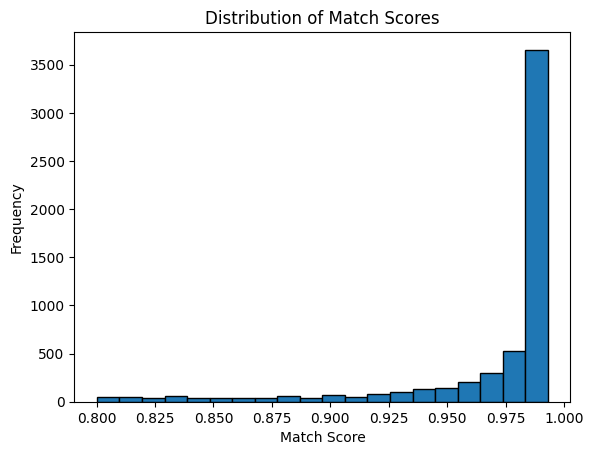

In [39]:
import matplotlib.pyplot as plt

# Create a list of scores
scores = [score for (index1, index2), score in results]

# Create a histogram
plt.hist(scores, bins=20, edgecolor='black')

# Add title and labels
plt.title('Distribution of Match Scores')
plt.xlabel('Match Score')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [40]:
import pandas as pd

submission = [(index1, index2, score) for (index1, index2), score in results]

df = pd.DataFrame(submission, columns=['left_dataset', 'right_dataset', 'confidence_score'])

In [41]:
df

,left_dataset,right_dataset,confidence_score
0,25006,69681,0.993107
1,59518,43628,0.993105
2,11036,20773,0.993104
3,70127,29161,0.993104
4,87161,38724,0.993104
...,...,...,...
5709,80704,51693,0.800800
5710,59297,62309,0.800511
5711,4989,66717,0.800285
5712,47895,35496,0.800262


# Write into One Function

In [26]:
import random
import numpy as np
import pandas as pd
import re
import dedupe
from dedupe import RecordLink


In [27]:
filepath = '/Users/chloe/Desktop/python/dedupe_submission.csv'
left_df = pd.read_csv('/Users/chloe/Desktop/group-project-spring-2024/Data/GroupProject/entity-resolution/left_dataset.csv')
right_df = pd.read_csv('/Users/chloe/Desktop/group-project-spring-2024/Data/GroupProject/entity-resolution/right_dataset.csv')

In [36]:

def process_and_link_data(left_df, right_df, filepath):
    # Preprocess DataFrames
    right_df.rename(columns={'zip_code': 'postal_code'}, inplace=True)
    #    random.seed(10201)
    #    np.random.seed(10201)
    def preprocess_data(df):
        df['postal_code'] = df['postal_code'].astype(str).str.split('-').str[0].str.strip()
        df['state'] = df['state'].astype(str).str.strip()
        df['name'] = df['name'].astype(str).str.lower().str.strip().apply(lambda x: re.sub(r'[^\w\s]', '', x))
        df['address'] = df['address'].astype(str).str.lower().str.strip().apply(lambda x: re.sub(r'[^\w\s]', '', x))
        df['city'] = df['city'].astype(str).str.lower().str.strip().apply(lambda x: re.sub(r'[^\w\s]', '', x))
        return df
    
    left_df = preprocess_data(left_df)
    right_df = preprocess_data(right_df)
    
    left_df.fillna('unknown', inplace=True)
    left_df['postal_code'] = left_df['postal_code'].astype(str).apply(lambda x: x.split('.')[0])
    
    # Convert data to dictionaries
    data_1 = {i: row.to_dict() for i, row in left_df.iterrows()}
    data_2 = {i: row.to_dict() for i, row in right_df.iterrows()}
    
    # Set up dedupe
    fields = [{'field': field, 'type': 'String'} for field in ['name', 'address', 'city', 'state', 'postal_code']]
    linker = RecordLink(fields)
    
    # Prepare training
    linker.prepare_training(data_1, data_2)
    dedupe.console_label(linker)
    linker.train()
    
    # Match records
    results = linker.join(data_1, data_2, threshold=0.8)
    submission = [(index1, index2, score) for (index1, index2), score in results]
    
    # Create DataFrame
    df = pd.DataFrame(submission, columns=['left_dataset', 'right_dataset', 'confidence_score'])
    df.to_csv(filepath, index=False)
    return df


In [37]:
df = process_and_link_data(left_df, right_df, filepath)

name : whole body yoga studio
address : 103 e walnut st
city : north wales
state : PA
postal_code : 19454

name : whole body yoga studio llc
address : 103 e walnut st
city : north wales
state : PA
postal_code : 19454

0/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished


 y


name : whiskey willys
address : 8020 w hillsborough ave
city : tampa
state : FL
postal_code : 33615

name : whiskey willys inc
address : 8020 w hillsborough ave
city : tampa
state : FL
postal_code : 33615

1/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 y


name : the cake shop
address : 20327 bruce b downs blvd
city : tampa
state : FL
postal_code : 33647

name : the cake shop wesley chapel corp
address : 20327 bruce b downs blvd
city : tampa
state : FL
postal_code : 33647

2/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 y


name : absolute endodontics
address : 725 e 65th st ste 400
city : indianapolis
state : IN
postal_code : 46220

name : absolute endodonitcs lc
address : 725 e 65th st ste 400
city : indianapolis
state : IN
postal_code : 46220

3/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 y


name : courigans irish pub
address : 1 beach dr se ste 41
city : saint petersburg
state : FL
postal_code : 33701

name : courigans irish pub inc
address : 1 beach dr se ste 41 courigans
city : saint petersburg
state : FL
postal_code : 33701

4/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 y


name : mcgarr associates
address : 640 spence lane ste 205
city : nashville
state : TN
postal_code : 37217

name : mcgarr  associates inc
address : 640 spence ln ste 205
city : nashville
state : TN
postal_code : 37217

5/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 y


name : the ups store
address : 13 summit square ctr
city : langhorne
state : PA
postal_code : 19047

name : cdu stormwater maintenance  management systems llc
address : 13 summit square ctr  185
city : langhorne
state : PA
postal_code : 19047

6/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : boca bargoons tampa
address : 1029 e hillsborough ave
city : tampa
state : FL
postal_code : 33604

name : boca bargoons of tampa inc
address : 1029 east hillsbough ave
city : tampa
state : FL
postal_code : 33604

6/10 positive, 1/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 y


name : sonic drivein
address : 2501 franklin rd
city : nashville
state : TN
postal_code : 37204

name : sonic drivein nashville charlotte pike llc
address : 6308 charlotte pike
city : nashville
state : TN
postal_code : 37209

7/10 positive, 1/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : speedway
address : 7339 pendleton pike
city : indianapolis
state : IN
postal_code : 46226

name : speedway baptist church inc
address : 2986 moller rd
city : indianapolis
state : IN
postal_code : 46224

7/10 positive, 2/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : new hong kong chinese restaurant
address : 10801 starkey rd ste 5
city : seminole
state : FL
postal_code : 33777

name : newhongkong chinese restaurant
address : 10801 starkey rd 5
city : largo
state : FL
postal_code : 33777

7/10 positive, 3/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 y


name : anthem
address : 125 12th ave n
city : nashville
state : TN
postal_code : 37203

name : m2vk management group llc
address : 125 12th ave
city : nashville
state : TN
postal_code : 37203

8/10 positive, 3/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : ultra steam
address : 12747 olive blvd
city : st loius
state : MO
postal_code : 63141

name : united construction ent co of st louis
address : 12747 olive blvd ste 101
city : saint louis
state : MO
postal_code : 63141

8/10 positive, 4/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : james cimbak od maple glen eyecare
address : 701 limekiln pike ste 4
city : maple glen
state : PA
postal_code : 19002

name : naml
address : 7401 limekiln pike
city : philadelphia
state : PA
postal_code : 19138

8/10 positive, 5/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : mémé
address : 2201 spruce st
city : philadelphia
state : PA
postal_code : 19103

name : drc spruce street llc
address : 2201 spruce st
city : philadelphia
state : PA
postal_code : 19103

8/10 positive, 6/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : eagle creek pizza
address : 5510 lafayetter rd
city : indianapolis
state : IN
postal_code : 46254

name : eagle creek dentistry llc
address : 5685 lafayette road suite 100
city : indianapolis
state : IN
postal_code : 46254

8/10 positive, 7/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : usa tax service
address : 6234 ridge ave
city : philadelphia
state : PA
postal_code : 19128

name : moxie tax  financial services inc
address : 6234 ridge ave
city : philadelphia
state : PA
postal_code : 19128

8/10 positive, 8/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : a mano
address : 2244 fairmount ave
city : philadelphia
state : PA
postal_code : 19130

name : tw restaurant 1623 llc
address : 2244 fairmount ave
city : philadelphia
state : PA
postal_code : 19130

8/10 positive, 9/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : st louis q
address : 6300 w florissant ave
city : saint louis
state : MO
postal_code : 63136

name : st louis apparel manufacturing llc  saf0410
address : 1301 gravois ave
city : saint louis
state : MO
postal_code : 63104

8/10 positive, 10/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : music city
address : 7107 crossroads blvd ste 107
city : brentwood
state : TN
postal_code : 37027

name : music city dental family cosmetic and implant dentistry p
address : 705 craighead st
city : nashville
state : TN
postal_code : 37204

8/10 positive, 11/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : st louis bread
address : 1445 st louis galleria
city : richmond heights
state : MO
postal_code : 63117

name : st louis auto radiator  air conditioning inc
address : 4130 delor
city : saint louis
state : MO
postal_code : 63116

8/10 positive, 12/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : exton diner family restaurant
address : 100 marchwood rd
city : exton
state : PA
postal_code : 19341

name : monanoor inc
address : 100 marchwood rd
city : exton
state : PA
postal_code : 19341

8/10 positive, 13/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : techartista  cwe
address : 4818 washington blvd
city : saint louis
state : MO
postal_code : 63108

name : revoice
address : 4818 washington blvd
city : saint louis
state : MO
postal_code : 63108

8/10 positive, 14/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 n


name : tampa bay tint
address : 702 e bearss ave ste a
city : tampa
state : FL
postal_code : 33613

name : tampa bay renal llc
address : 508 s habana ave ste 270
city : tampa
state : FL
postal_code : 33609

8/10 positive, 15/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


 f


Finished labeling


In [39]:
df

,left_dataset,right_dataset,confidence_score
0,25006,69681,0.996903
1,59518,43628,0.996833
2,11036,20773,0.996815
3,70127,29161,0.996797
4,87161,38724,0.996790
...,...,...,...
6004,53674,68001,0.801700
6005,90497,76008,0.801700
6006,45946,51519,0.801271
6007,13763,83668,0.801250


In [1]:
pip show dedupe

Name: dedupe
Version: 2.0.23
Summary: A python library for accurate and scaleable data deduplication and entity-resolution
Home-page: 
Author: 
Author-email: Forest Gregg <fgregg@datamade.us>
License: The MIT License (MIT)

Copyright (c) 2014 Forest Gregg, Derek Eder, DataMade and Contributors

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABI